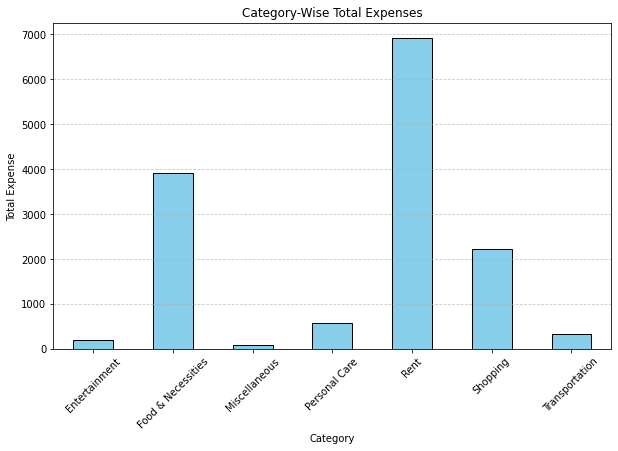

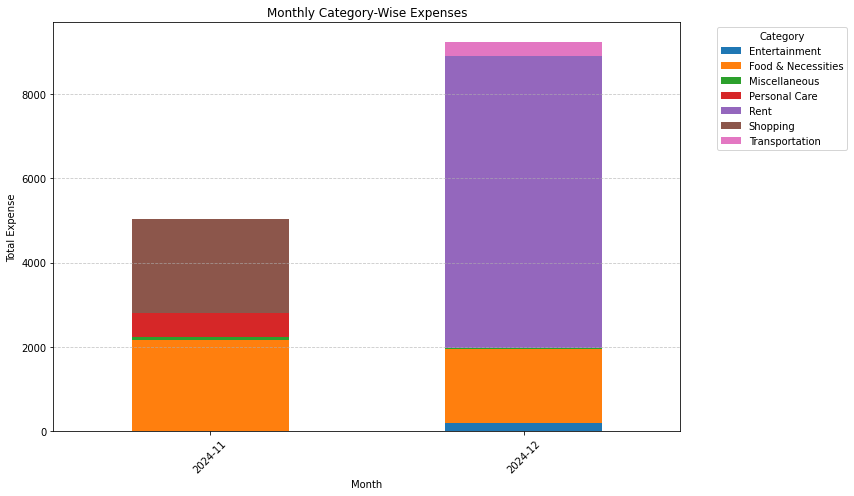


Highest Expense Per Date:
         date  amount
0  2024-11-24     160
1  2024-11-25     500
2  2024-11-26      83
3  2024-11-27     115
4  2024-11-28    2222
5  2024-11-29     211
6  2024-11-30     473
7  2024-12-01    6250
8  2024-12-02     199
9  2024-12-03      93
10 2024-12-04     141
11 2024-12-06     214
12 2024-12-07      77

Highest Expense Month: 2024-12 (Total: 9230)


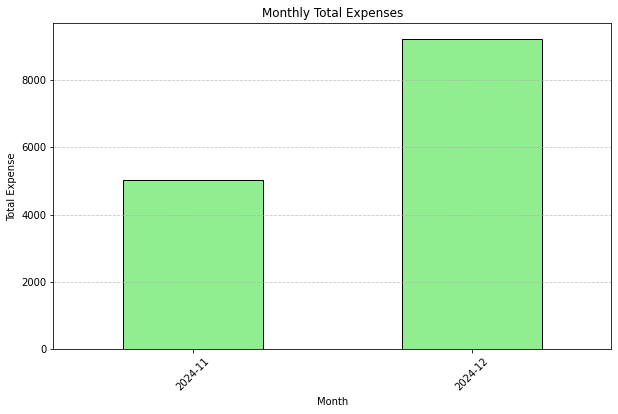

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the daily expenses data
daily_expenses_file = "expenses.xlsx"

try:
    data = pd.read_excel(daily_expenses_file)
except FileNotFoundError:
    print(f"Error: The file '{daily_expenses_file}' does not exist.")
    raise

# Ensure 'date' is in datetime format
data['date'] = pd.to_datetime(data['date'], format='%d.%m.%y')

# Add a 'month' column
data['month'] = data['date'].dt.strftime('%Y-%m')

# ---- 1. Category-Wise Total Expenses ----
category_expenses = data.groupby('category')['amount'].sum()

# Plot: Category-Wise Total Expenses
plt.figure(figsize=(10, 6))
category_expenses.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Category-Wise Total Expenses')
plt.xlabel('Category')
plt.ylabel('Total Expense')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ---- 2. Monthly Category-Wise Expenses ----
monthly_category_expenses = data.groupby(['month', 'category'])['amount'].sum().unstack()

# Plot: Monthly Category-Wise Expenses
monthly_category_expenses.plot(kind='bar', figsize=(12, 7), stacked=True)
plt.title('Monthly Category-Wise Expenses')
plt.xlabel('Month')
plt.ylabel('Total Expense')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ---- 3. Highest Expense Per Day ----
highest_expense_per_day = data.groupby('date')['amount'].max().reset_index()
print("\nHighest Expense Per Date:")
print(highest_expense_per_day)

# ---- 4. Highest Expense Per Month ----
monthly_totals = data.groupby('month')['amount'].sum()
highest_expense_month = monthly_totals.idxmax()
highest_expense_month_total = monthly_totals.max()

print(f"\nHighest Expense Month: {highest_expense_month} (Total: {highest_expense_month_total})")

# Plot: Monthly Total Expenses
plt.figure(figsize=(10, 6))
monthly_totals.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Monthly Total Expenses')
plt.xlabel('Month')
plt.ylabel('Total Expense')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
